**PCOS PREDICTION USING MACHINE LEARNING MODEL**

**INTRODUCTION**

Polycystic Ovary Syndrome (PCOS) is a common hormonal disorder affecting women of reproductive age, leading to irregular menstrual cycles, infertility, and metabolic complications. This project aims to analyze a PCOS dataset using machine learning techniques to identify key factors associated with the condition and build predictive models for early diagnosis.

In these project, the dataset contains medical and lifestyle-related attributes collected from women, including Demographic Details such as Age, BMI, and ethnicity, Menstrual and Hormonal Features such as Menstrual regularity, hirsutism, and acne severity, Metabolic Indicators such as Insulin resistance, stress levels, and PCOS family history, Diagnosis Label such as Indicates whether a person has PCOS (Yes/No). Among these the target variable is Diagnosis,which indicates whether the patient has been diagnosed with PCOS or not.

Using machine learning techniques such as Logistic Regression, Randon Forest, Decision Tree, KNN, and SVM, the study aims to classify patients based on medical and lifestyle attributes. Data preprocessing, exploratory analysis, and model evaluation help derive insights that can assist healthcare professionals in early detection and intervention for PCOS.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv("C:\\Users\\smartech\\OneDrive\\Desktop\\pcos_prediction_dataset.csv")

In [7]:
df

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,Guinea,28,Normal,Regular,No,Moderate,Yes,No,3,Low,Urban,Middle,Yes,Yes,0.090663,African,No
119996,Mozambique,35,Overweight,Regular,No,NaN,No,No,5,Low,Rural,High,Yes,Yes,0.167482,Asian,No
119997,Cambodia,16,Normal,Regular,No,Moderate,No,No,9,Medium,Rural,Low,Yes,Yes,0.236241,African,Yes
119998,Benin,15,Obese,Regular,Yes,NaN,Yes,Yes,1,Medium,Rural,High,No,No,0.119993,Hispanic,No


In [9]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [11]:
print(df.describe())

                 Age  Lifestyle Score  Undiagnosed PCOS Likelihood
count  120000.000000    120000.000000                120000.000000
mean       31.980508         5.506567                     0.149937
std        10.096799         2.871052                     0.057786
min        15.000000         1.000000                     0.050001
25%        23.000000         3.000000                     0.099820
50%        32.000000         6.000000                     0.149844
75%        41.000000         8.000000                     0.200061
max        49.000000        10.000000                     0.249998


In [13]:
df['Acne Severity'] = df['Acne Severity'].fillna(method='ffill')

C:\Users\smartech\AppData\Local\Temp\ipykernel_12344\325600068.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Acne Severity'] = df['Acne Severity'].fillna(method='ffill')


In [15]:
print(df.isnull().sum())

Country                        0
Age                            0
BMI                            0
Menstrual Regularity           0
Hirsutism                      0
Acne Severity                  0
Family History of PCOS         0
Insulin Resistance             0
Lifestyle Score                0
Stress Levels                  0
Urban/Rural                    0
Socioeconomic Status           0
Awareness of PCOS              0
Fertility Concerns             0
Undiagnosed PCOS Likelihood    0
Ethnicity                      0
Diagnosis                      0
dtype: int64


In [17]:
print(df.duplicated().sum())

0


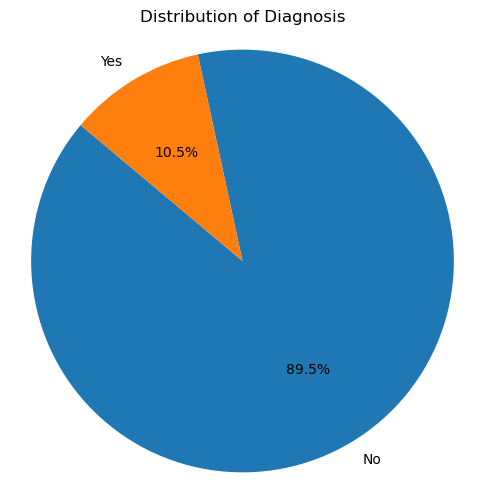

In [19]:
acne_counts=df['Diagnosis'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(acne_counts.values,labels=acne_counts.index,autopct='%1.1f%%',startangle=140)
plt.title("Distribution of Diagnosis")
plt.axis('equal')
plt.show()

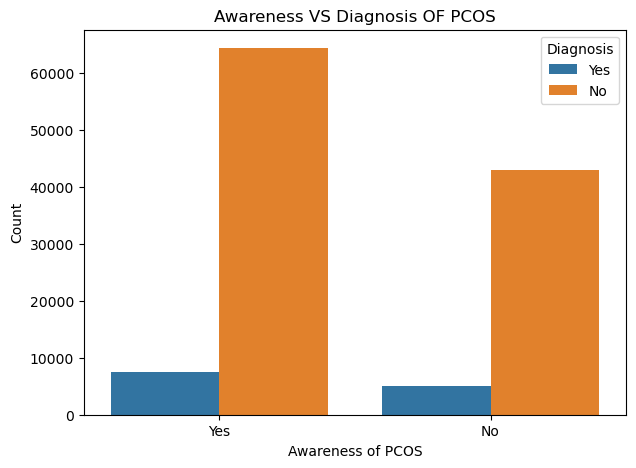

In [21]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Awareness of PCOS', hue='Diagnosis')
plt.title('Awareness VS Diagnosis OF PCOS')
plt.xlabel('Awareness of PCOS')
plt.ylabel('Count')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

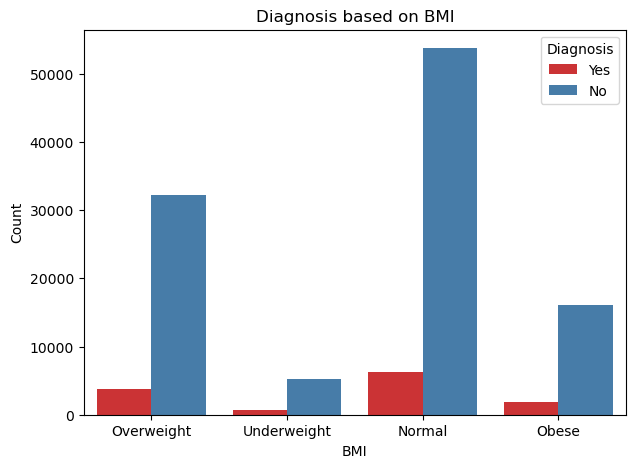

In [22]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='BMI', hue='Diagnosis', palette='Set1')
plt.title('Diagnosis based on BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

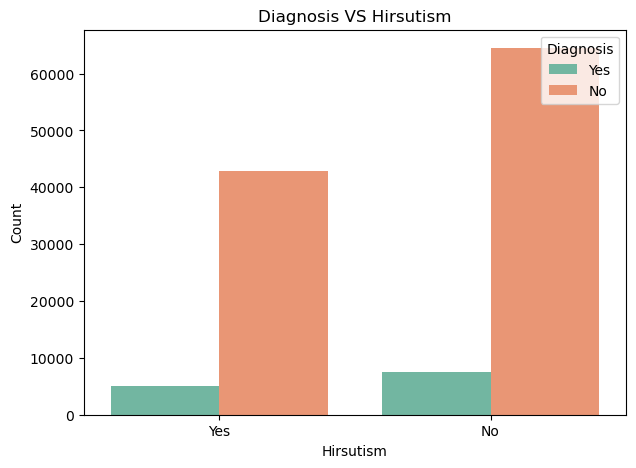

In [24]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Hirsutism', hue='Diagnosis',palette='Set2')
plt.title('Diagnosis VS Hirsutism')
plt.xlabel('Hirsutism')
plt.ylabel('Count')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

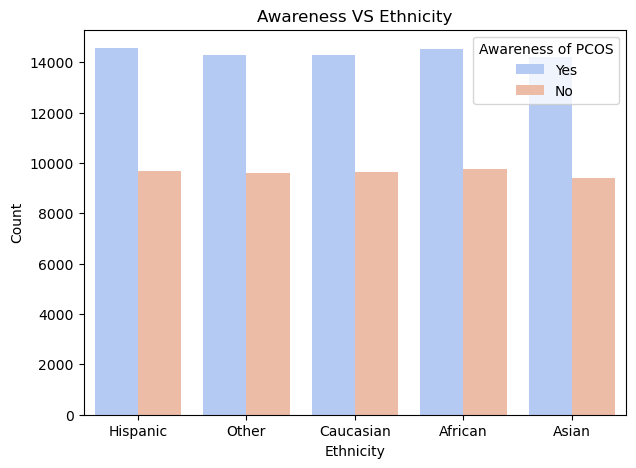

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Ethnicity', hue='Awareness of PCOS',palette='coolwarm')
plt.title('Awareness VS Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.legend(title='Awareness of PCOS', loc='upper right')
plt.show()

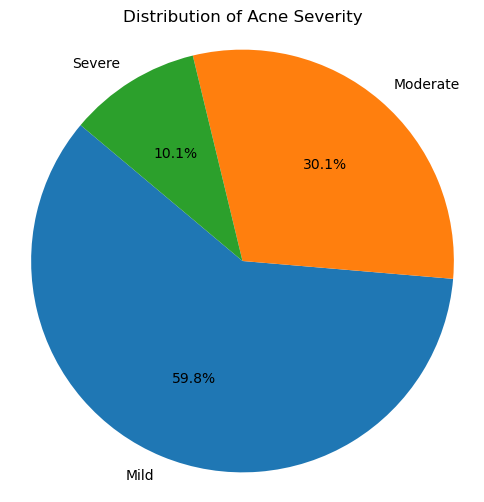

In [27]:
acne_counts=df['Acne Severity'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(acne_counts.values,labels=acne_counts.index,autopct='%1.1f%%',startangle=140)
plt.title("Distribution of Acne Severity")
plt.axis('equal')
plt.show()

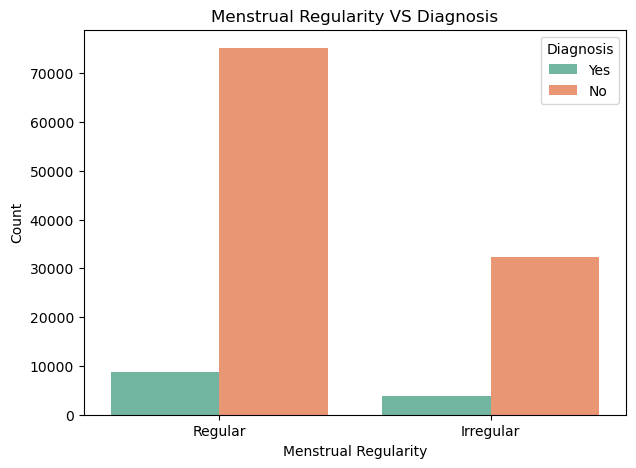

In [29]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Menstrual Regularity', hue='Diagnosis',palette='Set2')
plt.title('Menstrual Regularity VS Diagnosis')
plt.xlabel('Menstrual Regularity')
plt.ylabel('Count')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

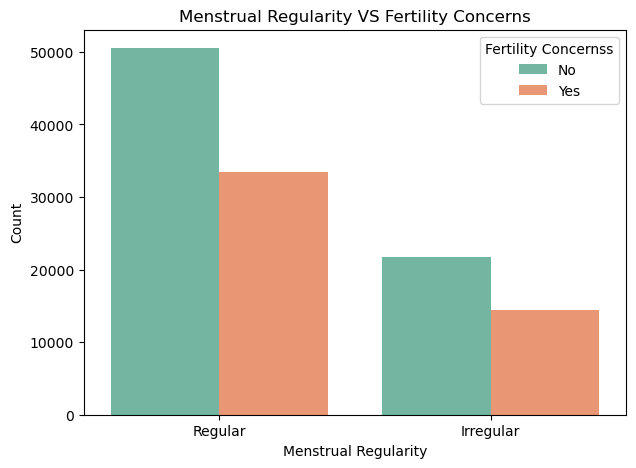

In [30]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Menstrual Regularity', hue='Fertility Concerns',palette='Set2')
plt.title('Menstrual Regularity VS Fertility Concerns')
plt.xlabel('Menstrual Regularity')
plt.ylabel('Count')
plt.legend(title='Fertility Concernss', loc='upper right')
plt.show()

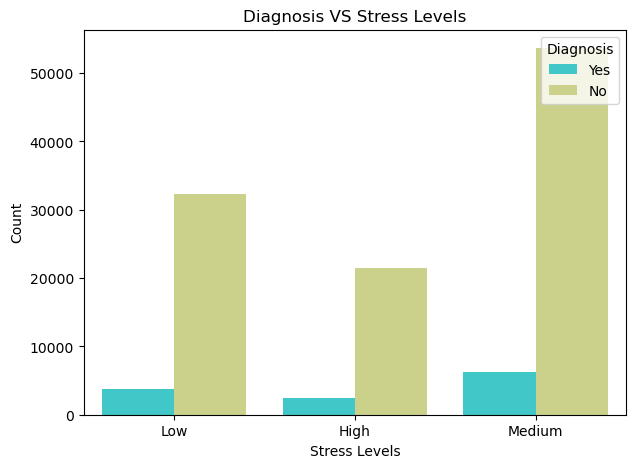

In [32]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Stress Levels', hue='Diagnosis', palette='rainbow')
plt.title('Diagnosis VS Stress Levels')
plt.xlabel('Stress Levels')
plt.ylabel('Count')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

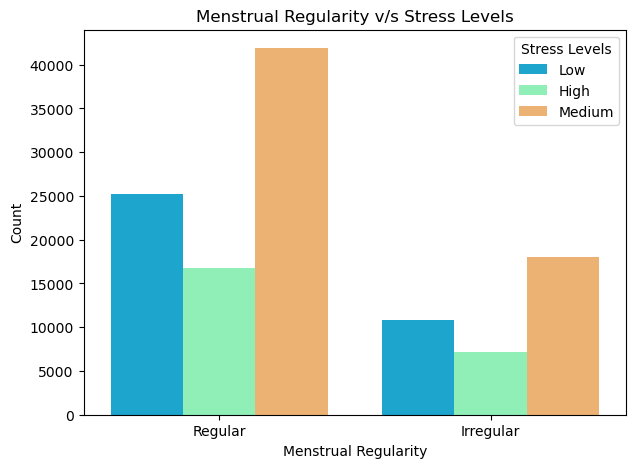

In [34]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Menstrual Regularity', hue='Stress Levels', palette='rainbow')
plt.title('Menstrual Regularity v/s Stress Levels')
plt.xlabel('Menstrual Regularity')
plt.ylabel('Count')
plt.legend(title='Stress Levels', loc='upper right')
plt.show()

In [35]:
bmi_mapping = {'Underweight': 1,'Normal': 2,'Overweight': 3,'Obese':4 }
df['BMI'] = df['BMI'].map(bmi_mapping)

In [41]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [43]:
numerical_columns

Index(['Age', 'BMI', 'Lifestyle Score', 'Undiagnosed PCOS Likelihood'], dtype='object')

In [45]:
categorical_columns

Index(['Country', 'Menstrual Regularity', 'Hirsutism', 'Acne Severity',
       'Family History of PCOS', 'Insulin Resistance', 'Stress Levels',
       'Urban/Rural', 'Socioeconomic Status', 'Awareness of PCOS',
       'Fertility Concerns', 'Ethnicity', 'Diagnosis'],
      dtype='object')

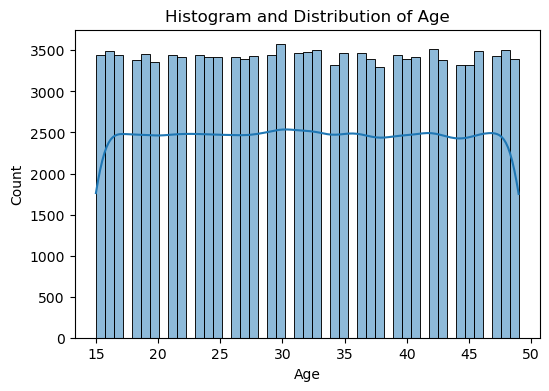

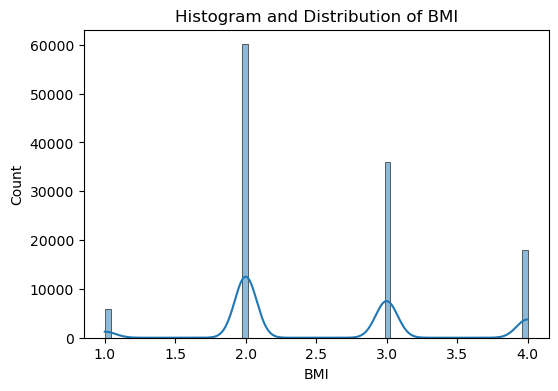

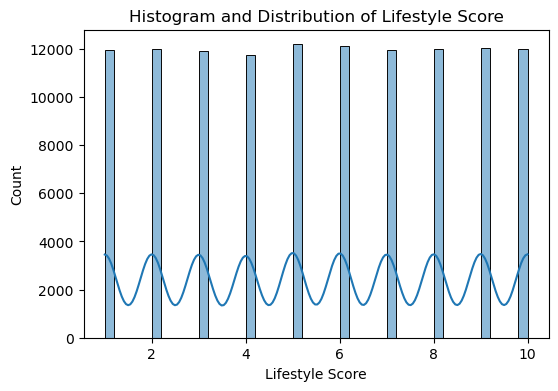

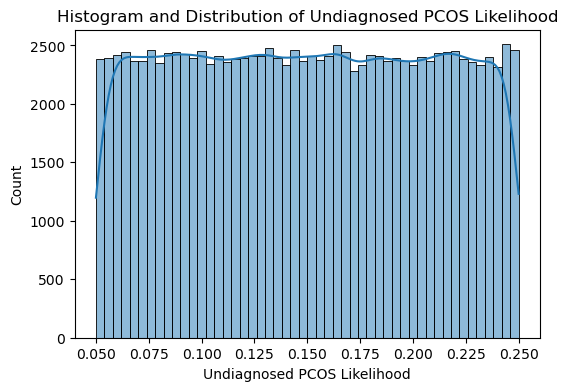

In [47]:
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.histplot(x=df[col],kde=True)
    plt.title(f'Histogram and Distribution of {col}')
    plt.show()

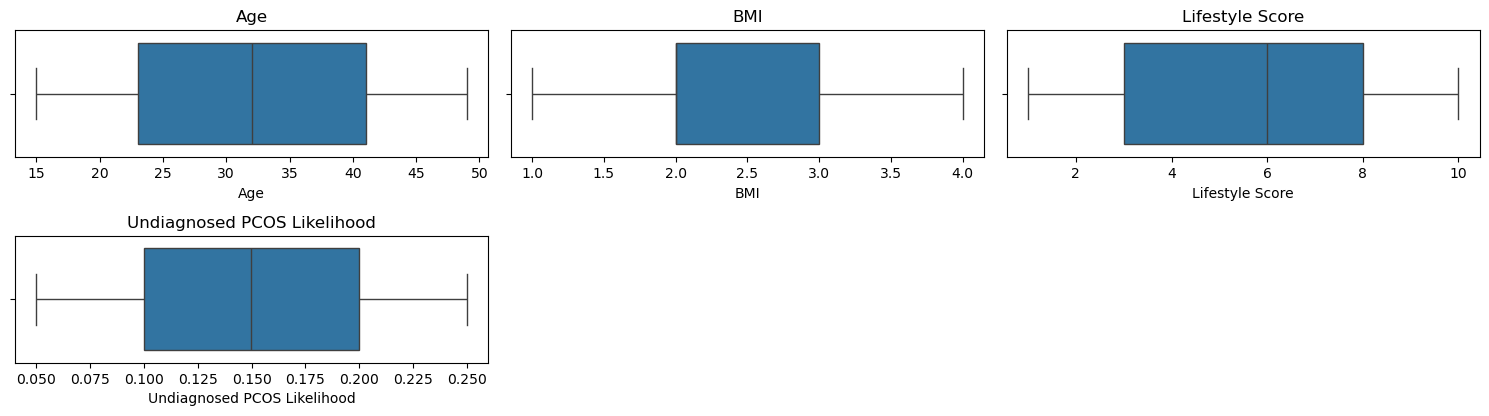

In [48]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns,1):
    plt.subplot(5,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

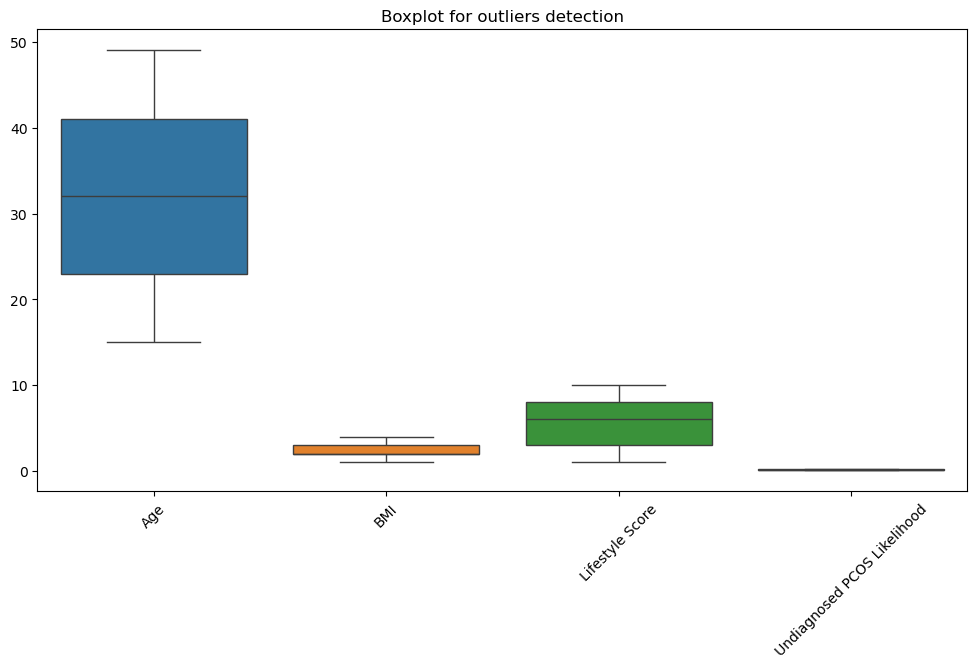

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot( data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for outliers detection')
plt.show()

In [50]:
binary_cols= ['Diagnosis','Family History of PCOS', 'Hirsutism']
df[binary_cols]= df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [51]:
df_encoded = pd.get_dummies(df, columns=['Menstrual Regularity', 'Acne Severity','Insulin Resistance','Stress Levels','Awareness of PCOS','Fertility Concerns'], drop_first=True)

In [53]:
df_encoded.drop(columns=['Country','Ethnicity','Urban/Rural','Socioeconomic Status'],inplace=True,axis=1)

In [54]:
df_encoded.sample()

,Age,BMI,Hirsutism,Family History of PCOS,Lifestyle Score,Undiagnosed PCOS Likelihood,Diagnosis,Menstrual Regularity_Regular,Acne Severity_Moderate,Acne Severity_Severe,Insulin Resistance_Yes,Stress Levels_Low,Stress Levels_Medium,Awareness of PCOS_Yes,Fertility Concerns_Yes
58250,49,3,1,0,2,0.202624,0,True,True,False,False,False,True,True,True


In [56]:
print(f"Total columns:{len(df_encoded.columns)}")

Total columns:15


In [57]:
cor=df_encoded.corr()
cor

,Age,BMI,Hirsutism,Family History of PCOS,Lifestyle Score,Undiagnosed PCOS Likelihood,Diagnosis,Menstrual Regularity_Regular,Acne Severity_Moderate,Acne Severity_Severe,Insulin Resistance_Yes,Stress Levels_Low,Stress Levels_Medium,Awareness of PCOS_Yes,Fertility Concerns_Yes
Age,1.000000,0.005967,0.002150,0.000786,0.007267,0.002075,0.001994,-0.000687,0.001989,-0.001653,0.000881,-0.004813,0.006980,0.004953,-0.003125
BMI,0.005967,1.000000,-0.002900,0.003783,0.003505,-0.001351,-0.003428,-0.002042,-0.000382,0.001150,-0.002763,-0.001361,-0.000455,0.000579,-0.001794
Hirsutism,0.002150,-0.002900,1.000000,-0.001675,-0.002124,0.004843,0.001115,-0.002379,-0.005490,0.000730,0.000507,0.000280,-0.000106,-0.001182,0.001409
Family History of PCOS,0.000786,0.003783,-0.001675,1.000000,0.001139,-0.003229,-0.002051,-0.000187,0.002372,0.001559,-0.000090,-0.001982,0.002921,-0.002061,0.001287
Lifestyle Score,0.007267,0.003505,-0.002124,0.001139,1.000000,0.000284,0.001684,-0.001632,-0.003684,0.002642,-0.000103,-0.008221,0.005798,0.006393,0.002488
Undiagnosed PCOS Likelihood,0.002075,-0.001351,0.004843,-0.003229,0.000284,1.000000,0.001209,-0.002843,-0.002099,0.003189,-0.000227,0.001218,0.001386,-0.003218,-0.001473
Diagnosis,0.001994,-0.003428,0.001115,-0.002051,0.001684,0.001209,1.000000,-0.002272,0.001751,-0.002448,0.003489,0.001311,-0.000446,-0.003138,-0.003248
Menstrual Regularity_Regular,-0.000687,-0.002042,-0.002379,-0.000187,-0.001632,-0.002843,-0.002272,1.000000,0.001362,-0.000907,-0.001020,0.000284,-0.001266,-0.003388,-0.000928
Acne Severity_Moderate,0.001989,-0.000382,-0.005490,0.002372,-0.003684,-0.002099,0.001751,0.001362,1.000000,-0.220191,-0.000583,0.000192,0.005462,-0.000681,-0.001226
Acne Severity_Severe,-0.001653,0.001150,0.000730,0.001559,0.002642,0.003189,-0.002448,-0.000907,-0.220191,1.000000,-0.001408,0.007960,-0.006185,-0.000394,0.001961


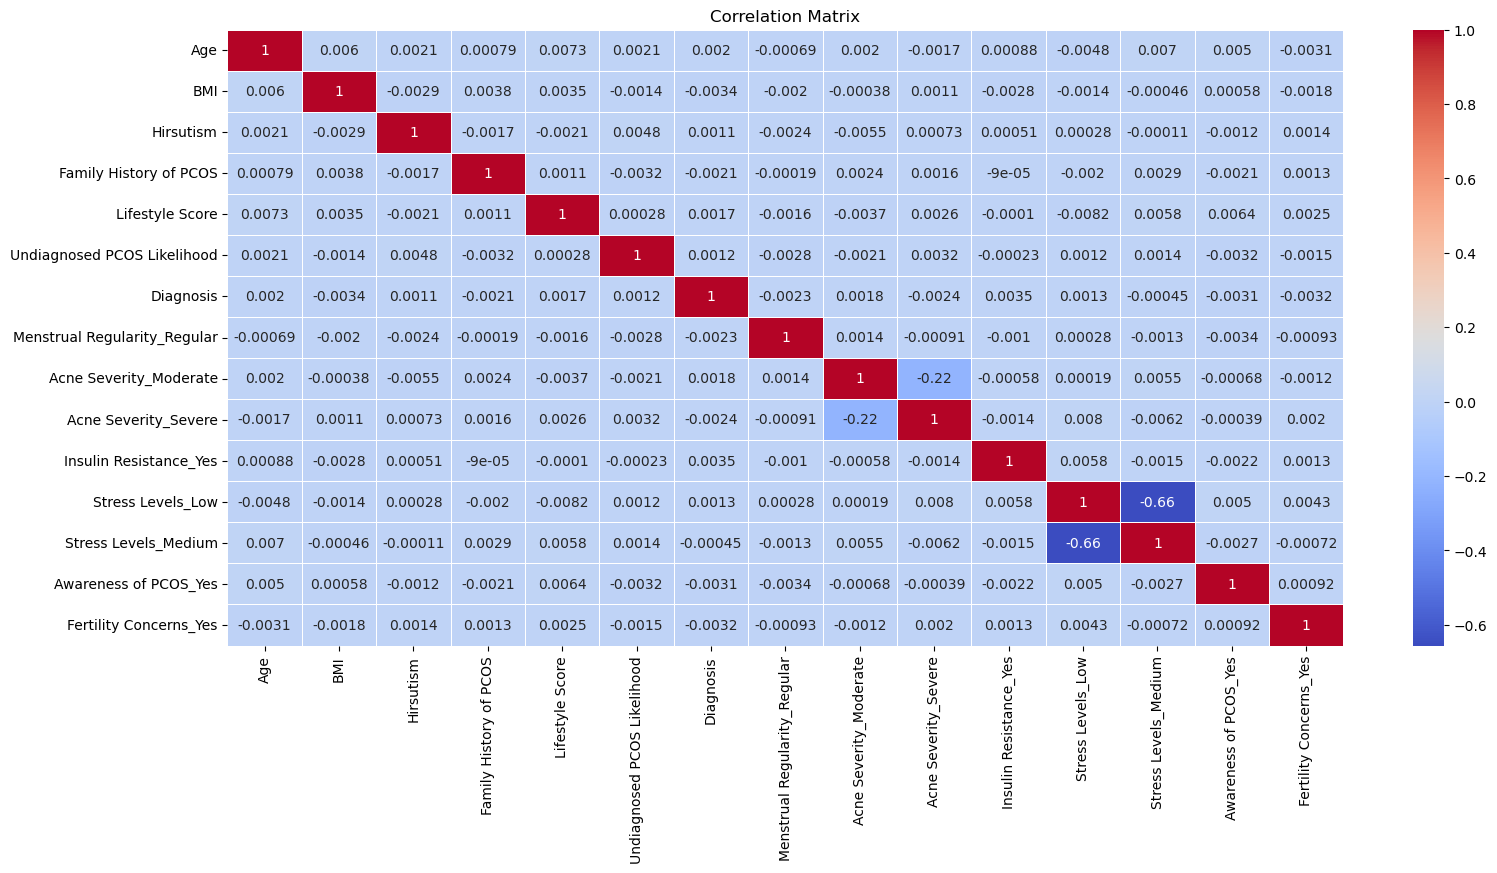

In [58]:
plt.figure(figsize=(18,8))
sns.heatmap(cor,annot=True,cmap="coolwarm",linewidth=0.5)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

**The correlation matrix shows weak linear relationships between most variables related to PCOS. Notable correlations include a strong negative relationship between low and medium stress levels (~ -0.6) and a moderate inverse correlation between moderate and severe acne (~ -0.22). Awareness of PCOS has a slight positive correlation with fertility concerns. Overall, the dataset suggests minimal linear dependencies**

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [70]:
X = df_encoded.drop(columns=['Diagnosis']) 
y = df_encoded['Diagnosis']

In [72]:
#Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded[numerical_columns])

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Handle Class Imbalance with SMOTE**

In [75]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:",np.bincount(y_train))
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution before SMOTE: [85948 10052]
Class distribution after SMOTE: Counter({1: 85948, 0: 85948})


**LOGISTIC REGRESSION**

In [78]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

print("Accuracy of Logistic Regression Performance:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression Performance: 0.5001666666666666
              precision    recall  f1-score   support

           0       0.89      0.50      0.64     21457
           1       0.10      0.48      0.17      2543

    accuracy                           0.50     24000
   macro avg       0.50      0.49      0.41     24000
weighted avg       0.81      0.50      0.59     24000

Confusion Matrix:
 [[10778 10679]
 [ 1317  1226]]


**RANDOM FOREST CLASSIFIER**

In [81]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy of Random Forest Model:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy of Random Forest Model: 0.7679583333333333
              precision    recall  f1-score   support

           0       0.89      0.84      0.87     21457
           1       0.10      0.16      0.13      2543

    accuracy                           0.77     24000
   macro avg       0.50      0.50      0.50     24000
weighted avg       0.81      0.77      0.79     24000

Confusion Matrix:
 [[18030  3427]
 [ 2142   401]]


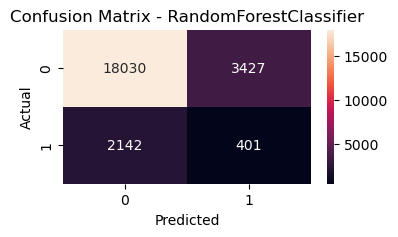

In [82]:
#Confusion Matrix for RandomForestClassifier
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()

**DECISION TREE MODEL**

In [84]:
dt_model = DecisionTreeClassifier(random_state=45, class_weight='balanced')
dt_model.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7599583333333333
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     21457
           1       0.10      0.16      0.12      2543

    accuracy                           0.76     24000
   macro avg       0.50      0.50      0.49     24000
weighted avg       0.81      0.76      0.78     24000

Confusion Matrix:
 [[17829  3628]
 [ 2133   410]]


**KNN MODEL** (k=5)

In [86]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.6455
              precision    recall  f1-score   support

           0       0.89      0.68      0.78     21457
           1       0.11      0.32      0.16      2543

    accuracy                           0.65     24000
   macro avg       0.50      0.50      0.47     24000
weighted avg       0.81      0.65      0.71     24000

Confusion Matrix:
 [[14685  6772]
 [ 1736   807]]


**SVM**

In [88]:
#SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_smote, y_train_smote)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.49583333333333335
              precision    recall  f1-score   support

           0       0.89      0.50      0.64     21457
           1       0.10      0.48      0.17      2543

    accuracy                           0.50     24000
   macro avg       0.50      0.49      0.40     24000
weighted avg       0.81      0.50      0.59     24000

Confusion Matrix:
 [[10673 10784]
 [ 1316  1227]]


In [89]:
models=['Logistic Regression','Random Forest','Decision Tree','KNN','Support Vector']
accuracies=[accuracy_score(y_test, y_pred),accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt),accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_svm)]

In [90]:
df_results=pd.DataFrame({'Model':models,'Accuracy':accuracies})
df_results

,Model,Accuracy
0,Logistic Regression,0.500167
1,Random Forest,0.767958
2,Decision Tree,0.759958
3,KNN,0.645500
4,Support Vector,0.495833


**the Random Forest model achieved the highest accuracy of 76.7%, making it the most reliable choice and best model for predicting PCOS in this dataset.** 

**CONCLUSION**

This project aimed to predict Polycystic Ovary Syndrome (PCOS) using machine learning models based on various health parameters. Through data analysis and model evaluation, several key insights were obtained:

**1.PCOS Awareness vs. Diagnosis:** While many individuals are aware of PCOS, there is still a gap between awareness and actual diagnosis. This highlights the need for better education and early screening.

**2.Impact of BMI on PCOS:** The analysis showed a significant correlation between BMI categories and PCOS diagnosis. Individuals with obesity or overweight conditions had a higher prevalence, emphasizing the role of weight management in PCOS risk.

**3.Model Performance Comparison:** Various machine learning models were tested, and Random Forest emerged as the best-performing model with an accuracy of 76.7%, followed by Decision Tree (75.9%). KNN , Logistic Regression and Support Vector Machines had lower accuracy, indicating their limitations in capturing complex patterns in these dataset.

**4.Importance of Machine Learning in Healthcare:** The study demonstrated how machine learning can assist in early detection and risk assessment of PCOS. These predictive models can help healthcare professionals in decision-making and proactive intervention.

**5.Handling Class Imbalance:** Since medical datasets often have an imbalance (fewer PCOS cases than non-PCOS), SMOTE (Synthetic Minority Over-sampling Technique) was applied to improve model performance, ensuring that minority class instances were well-represented.


**This project provide valuable insights into PCOS prediction using machine learning.The findings susggest that BMI,awareness and early screening plays acrucial role in managing PCOS risks. Based on the accuracy comparison of different models, the Random Forest model achieved the highest accuracy of 76.7%, making it the most reliable choice for predicting PCOS in this dataset. The Decision Tree model also performed well with 75.9% accuracy, while KNN, Logistic Regression, and Support Vector Machine (SVM) showed comparatively lower accuracies. This suggests that ensemble methods like Random Forest are better suited for this classification task, likely due to their ability to handle complex patterns and reduce overfitting.**